In [2]:

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip



--2019-12-10 09:00:22--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.167.128, 2a00:1450:400c:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.167.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  48.8MB/s    in 3.9s    

2019-12-10 09:00:26 (48.8 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2019-12-10 09:00:29--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.140.128, 2a00:1450:400c:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.140.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/tmp/

In [0]:
# get and save from dirve 


# New Section

In [0]:
import os
import zipfile



localZip='/tmp/rps.zip'
zipRef=zipfile.ZipFile(localZip,'r')
zipRef.extractall('/tmp/')
zipRef.close()

localZip='/tmp/rps-test-set.zip'
zipRef=zipfile.ZipFile(localZip,'r')
zipRef.extractall('/tmp/')
zipRef.close()





In [4]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [0]:
import os
rockDir=os.path.join('/tmp/rps/rock')
paperDir=os.path.join('/tmp/rps/paper')
sciDir=os.path.join('/tmp/rps/scissors')

rockFiles=os.listdir(rockDir)
paperFiles=os.listdir(paperDir)
scisFiles=os.listdir(sciDir)



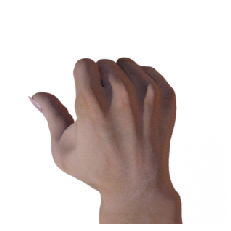

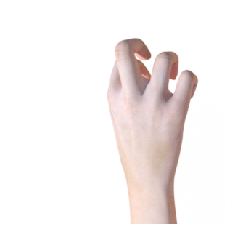

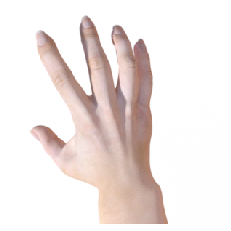

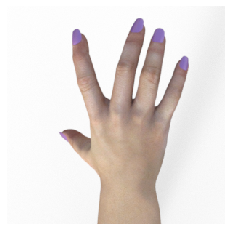

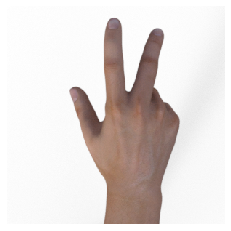

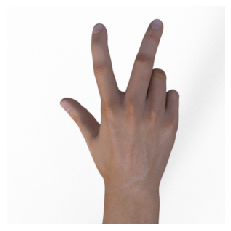

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mping
picIdx=2
nextrock=[os.path.join(rockDir,fname) for fname in rockFiles[0:2]]
nextpaper=[os.path.join(paperDir,fname) for fname in paperFiles[0:2]]
nextscissor=[os.path.join(sciDir,fname) for fname in scisFiles[0:2]]
for i,imgPath in enumerate(nextrock+nextpaper+nextscissor):
  img=mping.imread(imgPath)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

In [6]:
%tensorflow_version 2.x

import tensorflow as tf
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TrainningDir = "/tmp/rps/"
trainningDataGen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validationDir="/tmp/rps-test-set/"
validationDataGen=ImageDataGenerator(
    rescale=1./255
)
trainGen=trainningDataGen.flow_from_directory(
    TrainningDir,
    target_size=(150,150),
    class_mode='categorical'
)
validGen=validationDataGen.flow_from_directory(
    validationDir,
    target_size=(150,150),
    class_mode='categorical'

)
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax')
]     
)
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit_generator(trainGen,epochs=25,validation_data=validGen,verbose=1)
model.save('rps.h5')



Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_______________________________________

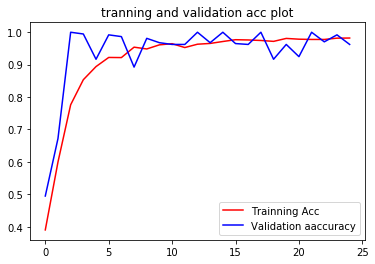

<Figure size 432x288 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
acc=history.history['accuracy']
valAcc=history.history['val_accuracy']
loss=history.history['loss']
valLoss=history.history['val_loss']

epochs=range(len(acc))
plt.plot(epochs,acc,'r',label='Trainning Acc')
plt.plot(epochs,valAcc,'b',label='Validation aaccuracy')
plt.title('tranning and validation acc plot')
plt.legend(loc=0)
plt.figure()
plt.show()


In [12]:
from google.colab import drive
drive.mount('/content/drive')

model.save('/tmp/rps.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import tensorflow as tf
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

loaded_model=tf.keras.models.load_model('rps.h5')

In [0]:
loaded_model